In [47]:
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from wordcloud import WordCloud



plt.rcParams["figure.figsize"] = (20,3)

seed = 1016

# Load and Manipulate Data

In [48]:
#Load data
col_names = ['Title', 'User', 'Time', 'Model', 'Satisfied', 'Unsatisfied']
nev_review_raw = pd.read_csv('/content/NEV_review_edited.csv', names = col_names, skiprows = [0, 1])
icev_review1_raw = pd.read_csv('/content/ICEV_review1_edited.csv', names = col_names, skiprows = [0, 1])
icev_review2_raw = pd.read_csv('/content/ICEV_review2_edited.csv', names = col_names, skiprows = [0, 1])

In [49]:
nev_review_raw.shape

(15387, 6)

In [50]:
nev_review_raw.head()

,Title,User,Time,Model,Satisfied,Unsatisfied
0,ModelY长续三个月深度体会（真实感受仅为分享不喜勿喷！）,美妮妮,2021-12-09 发表口碑,Model Y,1.内饰：可能是之前在欧洲工作，喜欢简洁（木纹金属翻皮，但不简陋）的内饰。家里另一辆车是保时...,1.空调逻辑：开到现在也没研究出就“出风“的模式，有时我只要出风（不用冷热），必须调到恰当的...
1,加速快，车机流畅，轮毂漂亮，红色相当满意。,想想小宝,2021-12-05 发表口碑,Model Y,1.红色车漆：最满意的地方就是选了红色车漆，临近交车前，看到了满大街全是黑色的Y，开了30分...,车顶有时候会有吱吱吱声，另外减配了中央扶手箱的usb数据功能。还有就是，胎压太大了，3.1的...
2,满载快乐出行,成都车友5264367,2022-08-18 发表口碑,Model Y,空间大、辅助驾驶给力。平常就喜欢带些毛毛狗狗出行，超大后备箱且汪汪也可以透过后排座椅吹空调他...,后备箱没有出风口、座椅“腿”太廉价、天窗太晒。虽然汪汪可以吹空调但只限于头，体验不佳感觉它们...
3,与小Y半年的小小心得,叶叶叶叶Yy,2022-08-18 发表口碑,Model Y,1.车辆的续航是最满意的一点，续航显示非常的精准，官方标准续航在545公里，目前成都天气炎热...,1.大天窗，不带遮阳帘，是我最喜欢，也是最不满意一点，成都夏天温度均在38-40左右，如果停...
4,喜欢其实很简单,随便起一个名儿,2022-08-19 发表口碑,Model Y,1.最满意的还是这个独一无二的外观，非常的独特有个性，别具一格2.内饰简约设计方式，打破传统...,特斯拉给我的感觉就是科技感爆棚，科技满满，但竟然不支持手机投屏，不支持carplay，不支持...


In [51]:
#Concat ICEV data
icev_review_raw = pd.concat([icev_review1_raw, icev_review2_raw], axis = 0, ignore_index = True)
icev_review_raw.shape

(21888, 6)

In [52]:
icev_review_raw.head()

,Title,User,Time,Model,Satisfied,Unsatisfied
0,日产轩逸，很值得入手。,入戏太深q9,2022-08-16 发表口碑,轩逸,日产轩逸整体的设计是很漂亮的，因为白色的车身显得更加的时尚，更加的干净了一些，珍珠白在太阳下...,最不满意的是日产轩逸这款车的空间不是特别大，整体的使用空间不是很宽敞，头部和腿部的空间表现有...
1,油耗低、颜值高、价格便宜，轩逸每一点都GET到我的点了。,衰仔车神,2022-08-14 发表口碑,轩逸,看了这么多的车，轩逸从综合性能上来讲，是我看的几款车里面比较均衡的了，特别就是比较适合我们这...,说实在的，买新车本身就是一件比较喜庆的事情，现在车开着也非常的顺畅，要说非常不满意的地方确实...
2,轩逸的简单，就是让人放心，很好用,珠海车友4437777,2022-08-14 发表口碑,轩逸,这点确实还是挺多的，其实整个车子看起来我对他最满意的地方，首先第一天就是一个设计方面吧，我觉...,并没有什么特别不满意的地方，因为整个车子其实看的也比较久，我觉得整个车子坐的都还行，除了这个...
3,喜欢轩逸这个高性价比,AILIXI,2022-08-12 发表口碑,轩逸,作为普普通通的上班一族，家用代步选择了轩逸，最满意的就是它的实用性了，首先从油耗上来讲，轩逸...,轩逸版算是性价比最高的版本了，不过缺点就是配置横向对比其他车还是有点低了的，比如电动座椅、巡...
4,喜欢的也确实挺让人满意,壹茳4dq,2022-08-09 发表口碑,轩逸,我对于这个车子最满意的地方，其实整体就是觉得性价比还是挺合适的吧，包括他的风格设计，还有他的...,其实也并没有什么让我特别不满意的地方，因为整体来说的话，我觉得用起来还是比较放心的，毕竟整体...


In [53]:
#Resample data
nev_review = nev_review_raw.sample(15000, random_state = seed)
icev_review = icev_review_raw.sample(15000, random_state = seed)
print(nev_review.shape)
print(icev_review.shape)

(15000, 6)
(15000, 6)


In [54]:
jieba.load_userdict('/content/汽车词汇大全.text')

# Load Stopwords and Define Wordclouud Function

In [55]:
with open('/content/中文停用词，标点符号-已分词.txt','r',encoding='utf-8') as f:
    stop_word = f.read()

In [56]:
stop_word += '\n新能源\n车\n满意\n喜欢\n比亚迪\n唐\n汉\n宋\n秦\n车子\n这款\n地方\n真的\n买\n感受\n挺\n用车\n这辆\n凯美瑞\n朗逸\n不太\n稍微\n新车\n感觉\n跑\n确实\n选择\n平时\n买车\n很大\n这车\n台车\n不用\n要说\n没什么\n有时候\n轩逸\nH6\n够用\n足够\n功能\n缺点'

In [57]:
stop_word_list = stop_word.split('\n')

# Create 10 Clusters with K-means Clustering

In [58]:
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from pprint import pprint
from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# 将进展日志呈现在stdout上
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse 命令行参数
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int", default=120,
              help="利用潜在语义分析对文本数据进行预处理")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=False,
              help="使用一般的K-means算法 (使用batch模式).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=False,
              help="禁用逆向文档频率特征加权。")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="使用Hashing特征向量")
op.add_option("--n-features", type=int, default=40000,
              help="从文本中提取的最大特征（维度）数量。")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="在K-means算法中打印进度报告。")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

#解决Jupyter  notebook 和IPython控制台的问题
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("该脚本不需要设置参数")
    sys.exit(1)

# #############################################################################

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    利用潜在语义分析对文本数据进行预处理
  --no-minibatch        使用一般的K-means算法 (使用batch模式).
  --no-idf              禁用逆向文档频率特征加权。
  --use-hashing         使用Hashing特征向量
  --n-features=N_FEATURES
                        从文本中提取的最大特征（维度）数量。
  --verbose             在K-means算法中打印进度报告。


In [59]:
def number_normalizer(tokens):
    """ Map all numeric tokens to a placeholder.

    For many applications, tokens that begin with a number are not directly
    useful, but the fact that such a token exists can be relevant.  By applying
    this form of dimensionality reduction, some methods may perform better.
    """
    return ("#NUMBER" if token[0].isdigit() else token for token in tokens)


class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super(NumberNormalizingVectorizer, self).build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))

In [60]:
part1 = nev_review['Satisfied']
part2 = nev_review['Unsatisfied']
part3 = icev_review['Satisfied']
part4 = icev_review['Unsatisfied']
part1.columns = ['All_Reviews']
part2.columns = ['All_Reviews']
part3.columns = ['All_Reviews']
part4.columns = ['All_Reviews']

review_stacked = pd.concat([part1, part2, part3, part4], ignore_index=True)
review_stacked = pd.DataFrame(review_stacked)
review_stacked.columns = ['Reviews']

In [61]:
jieba.enable_parallel()

review_stacked['Reviews_cutted'] = review_stacked['Reviews'].apply(lambda i:jieba.lcut(i) )

In [62]:
docs = review_stacked['Reviews_cutted']

In [63]:
review_stacked['Reviews_cutted'] =[' '.join(i) for i in docs]

In [64]:
print("%d 个文档" % len(review_stacked['Reviews_cutted']))
print()


print("使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        #对HashingVectorizer的输出实施IDF规范化
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words=stop_word_list, alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words=stop_word_list,
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = NumberNormalizingVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words=stop_word_list,ngram_range=(1, 2),
                                 use_idf=opts.use_idf)

X = vectorizer.fit_transform(review_stacked['Reviews_cutted'])

print("完成所耗费时间： %fs" % (time() - t0))
print("样本数量: %d, 特征数量: %d" % X.shape)
print()

if opts.n_components:
    print("用LSA进行维度规约（降维）")
    t0 = time()
    
    #Vectorizer的结果被归一化，这使得KMeans表现为球形k均值（Spherical K-means）以获得更好的结果。 
    #由于LSA / SVD结果并未标准化，我们必须重做标准化。
    
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("完成所耗费时间： %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("SVD解释方差的step: {}%".format(
        int(explained_variance * 100)))

    print('特征抽取完成！')

print('特征抽取完成！')
##############################################################################

60000 个文档

使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['#NUMBER', 'aboard', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'h6', 'hadn', 'hasn', 'haven', 'isn', 'lex', 'll', 'mon', 'nbsp', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  % sorted(inconsistent)


完成所耗费时间： 2.995485s
样本数量: 60000, 特征数量: 40000

用LSA进行维度规约（降维）
完成所耗费时间： 6.674276s
SVD解释方差的step: 32%
特征抽取完成！
特征抽取完成！


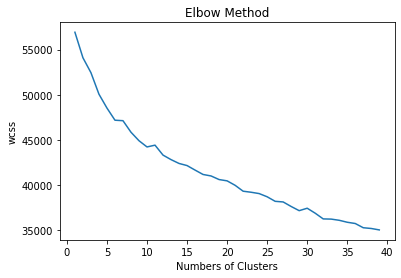

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

n_clusters= 40

wcss = []
for i in range(1,n_clusters):
    
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=2,
                verbose=opts.verbose)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,n_clusters),wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
labels = review_stacked['Reviews_cutted']
true_k = 10 #聚类数量

In [67]:
# 进行事实上的文本聚类

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=2,n_jobs=-1,
                         init_size=1000, batch_size=1500, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=5,
                verbose=opts.verbose)

print("对稀疏数据（Sparse Data） 采用 %s" % km)
t0 = time()
km.fit(X)
print("完成所耗费时间：%0.3fs" % (time() - t0))
print()

print("Homogeneity值: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness值: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure值: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index值: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient值: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

#用训练好的聚类模型反推文档的所属的主题类别
label_prediction = km.predict(X)   
label_prediction = list(label_prediction)


if not opts.use_hashing:
    print("Top Keywords for Each Cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d   " % (i+1), end='')
        print("该簇群所含文档占比为",'%.4f%%' % (int(label_prediction.count(i))/int(len(review_stacked['Reviews_cutted']))))
        print("簇群关键词：")
        for ind in order_centroids[i, :80]:
            print(' %s,' % terms[ind], end='')
        print('\n------------------------------------------------------------------------------------------------')

对稀疏数据（Sparse Data） 采用 KMeans(n_clusters=10, n_init=5, verbose=False)
完成所耗费时间：3.763s

Homogeneity值: 0.181
Completeness值: 1.000
V-measure值: 0.307
Adjusted Rand-Index值: 0.000
Silhouette Coefficient值: 0.094

每个聚类的TOP关键词:
簇群 1   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


该簇群所含文档占比为 0.0703%
簇群关键词：
 油耗, 空间, 动力, #NUMBER, 省油, 外观, 市区, 空间 油耗, 百公里, 高速, 油耗 油耗, 油耗 空间, 上下班, 表现, 混动, 平均, 性价比, 油耗 #NUMBER, 动力 油耗, 驾驶, 个油, 油耗 动力, 公里, 行驶, 油价, 偏高, 接受, 油耗 偏高, 颜值, 油耗 表现, 百公里 油耗, 油耗 外观, 发动机, 充电, 燃油, 配置, 操控, 起步, 情况, 车型, 平均 油耗, 外观 油耗, 油耗 百公里, 肯定, 磨合期, 开车, 经济, 油耗 市区, 比较满意, 提车, suv, 成本, 外形, 家用, 提速, 代步, 不到, 空调, 整体, 省钱, 加速, 价格, dm, 车身, 噪音, 日常, #NUMBER 公里, 舒服, 原因, 座椅, 大众, 朋友, 超级, 底盘, 一台, 后备箱, 续航, 预期, 模式, 想象,
------------------------------------------------------------------------------------------------
簇群 2   该簇群所含文档占比为 0.1141%
簇群关键词：
 外观, 空间, 大气, 好看, 时尚, 设计, 颜值, 外观 大气, 动力, 车身, 配置, 漂亮, 造型, 外观 好看, 整体, 外观 外观, 油耗, 霸气, 线条, 空间 外观, #NUMBER, 运动, 吸引, 车型, 符合, 前脸, 外观 内饰, 性价比, 外观 时尚, 外观 漂亮, 外观 空间, 大灯, 内饰, 外观设计, 看着, 外观 颜值, 帅气, 年轻, 省油, 操控, 耐看, 第一眼, 颜色, 适合, 肯定, 流畅, 科技, 驾驶, 大众, 年轻人, 审美, 稳重, 风格, 外观 霸气, 外观 造型, 一款, 回头率, ev, 外观 设计, 一种, 油耗 外观, 十足, 外观 吸引, 上档次, 外形, 舒服, 品牌, 比较满意, 价格, 宽敞, 性能, 座椅, 车身 线条, 一眼, 时尚 大气, led, 舒适, 很漂亮, 外观 油耗, 辨识,
----------------------------------------------------------------

In [68]:
labels=km.labels_.tolist()
l =  km.fit_predict(X)  
svd = TruncatedSVD(n_components=2).fit(X)
datapoint = svd.transform(X)

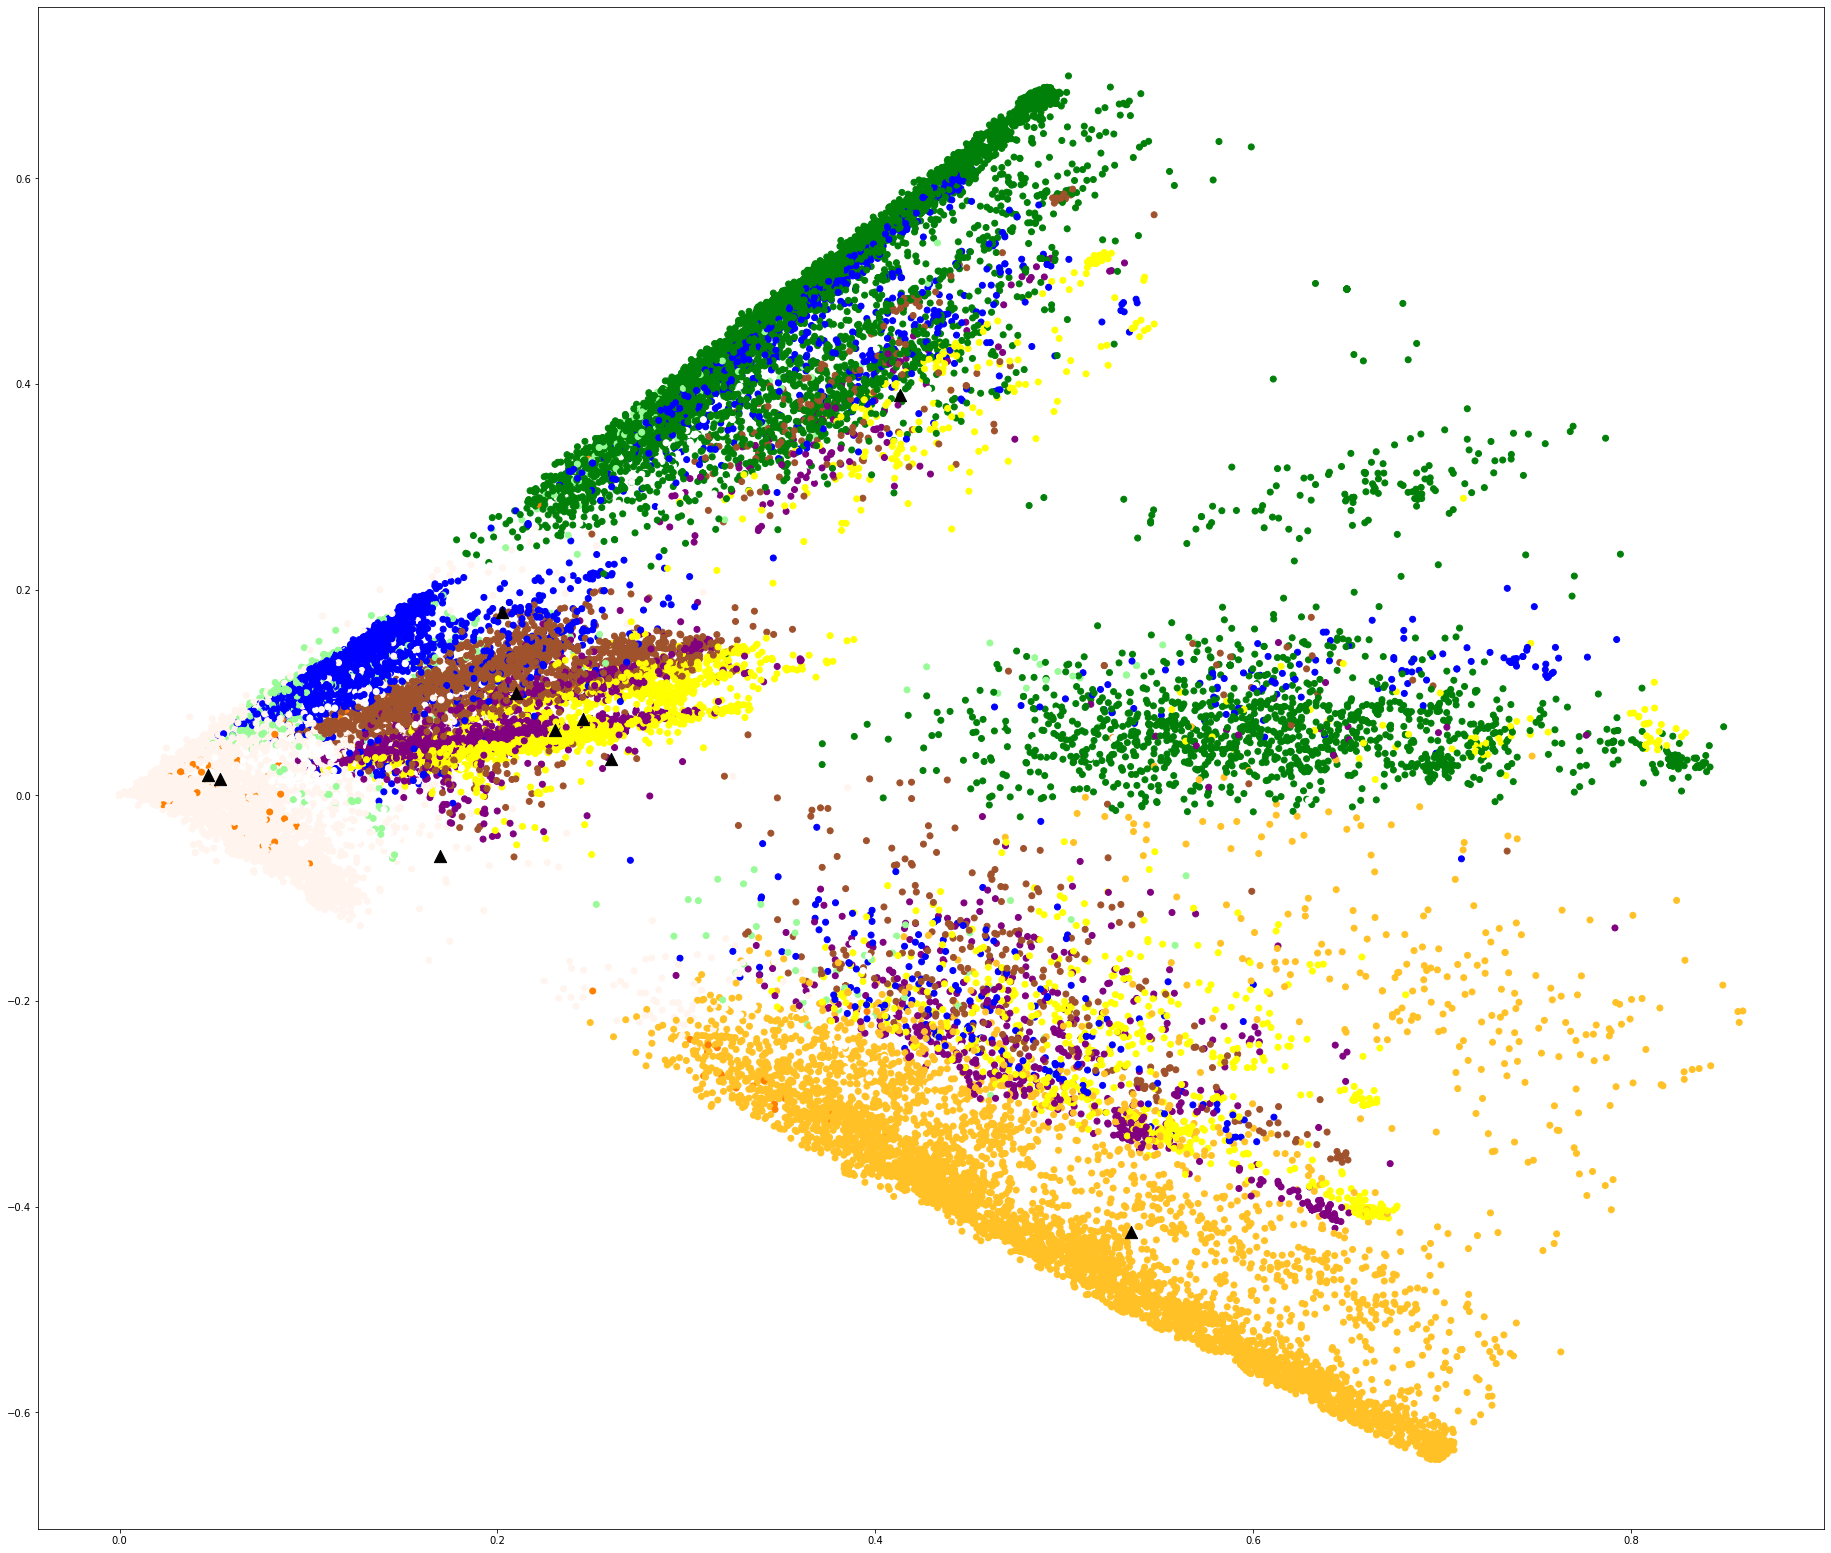

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32, 28))
label1 = [
    '#FFFF00', '#008008', '#0000FF','#800080','#FFF5EE','#98FB98','#A0522D',
    '#FF7F00','#FFC125','#FFFFFF','#FFFAFA','#FFF68F','#FFEFD5','#FFE4E1',
    '#FFDEAD','#FFC1C1','#FFB90F','#FFA54F','#FF8C00','#C0FF3E','#FF6EB4',
    '#FF4500','#FF3030','#8A2BE2','#87CEEB','#8470FF','#828282','#7EC0EE',
    '#7CFC00','#7A8B8B','#79CDCD','#76EE00']

color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = km.cluster_centers_
centroidpoint = svd.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()